In [27]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import gzip
import torch

In [28]:
m2f_data_dir = Path("../data/m2f_outputs").resolve()
assert m2f_data_dir.exists()

In [29]:
m2f_data_path = m2f_data_dir / "1.ptz"
assert m2f_data_path.exists()

In [30]:
with gzip.open(m2f_data_path, "r") as f:
    m2f_data = torch.load(f)
print(m2f_data.keys())

dict_keys(['mask', 'segments', 'mask_notta', 'segments_notta', 'confidences_notta', 'probabilities', 'confidences'])


In [31]:
print(m2f_data["mask"].shape)

torch.Size([968, 1296])


In [32]:
print(m2f_data["probabilities"].shape)

torch.Size([968, 1296, 22])


In [33]:
print(m2f_data["confidences"].shape)

torch.Size([968, 1296])


[0.0000000e+00 2.2890186e-05 6.9560814e-03 8.4416706e-06 7.8068866e-04
 8.2134938e-01 1.3997340e-01 9.5218857e-04 6.6118369e-06 9.6104122e-07
 2.6881692e-06 1.7714085e-05 1.1303590e-05 9.7415023e-07 1.1981851e-06
 7.2890598e-06 5.7058461e-04 3.7254987e-04 3.7841908e-06 5.9514146e-05
 2.4737834e-04 2.8654464e-02]
[0.0000000e+00 2.2890186e-05 6.9560814e-03 8.4416706e-06 7.8068866e-04
 8.2134938e-01 1.3997340e-01 9.5218857e-04 6.6118369e-06 9.6104122e-07
 2.6881692e-06 1.7714085e-05 1.1303590e-05 9.7415023e-07 1.1981851e-06
 7.2890598e-06 5.7058461e-04 3.7254987e-04 3.7841908e-06 5.9514146e-05
 2.4737834e-04 2.8654464e-02]
[0.0000000e+00 2.2890186e-05 6.9560814e-03 8.4416706e-06 7.8068866e-04
 8.2134938e-01 1.3997340e-01 9.5218857e-04 6.6118369e-06 9.6104122e-07
 2.6881692e-06 1.7714085e-05 1.1303590e-05 9.7415023e-07 1.1981851e-06
 7.2890598e-06 5.7058461e-04 3.7254987e-04 3.7841908e-06 5.9514146e-05
 2.4737834e-04 2.8654464e-02]
[0.0000000e+00 2.2890186e-05 6.9560814e-03 8.4416706e-06 7

(array([[4569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [4569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [4569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [4569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [4569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         4569.],
        [   0., 4569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [4569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [4569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [4569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [4569.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [4569.,    0.

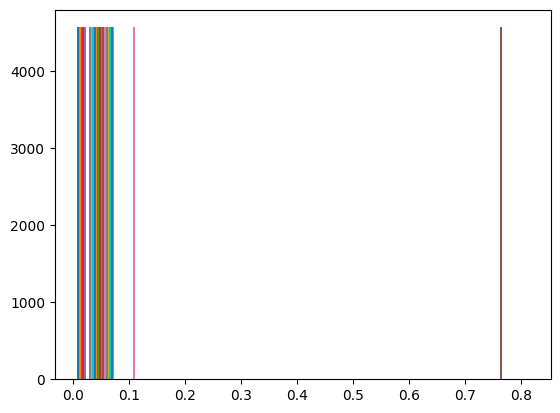

In [41]:
mask_0 = m2f_data["mask"] == 3  # mask of the 0th instance
probs_mask_0 = m2f_data["probabilities"][mask_0]
probs_mask_0 = probs_mask_0.cpu().numpy()
for i in range(10):
    print(probs_mask_0[i])
plt.hist(probs_mask_0, bins=10)

(array([26224617.,   120471.,        0.,        0.,        0.,        0.,
               0.,        0.,   125579.,  1128949.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

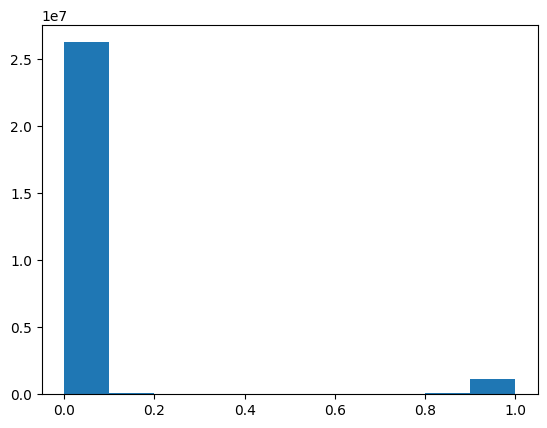

In [35]:
probability_np = m2f_data["probabilities"].cpu().numpy()

# print(np.unique(probability_np), len(np.unique(probability_np)))
plt.hist(probability_np.flatten(), bins=10)